In [ ]:
import pandas as pd
import pandas as pd
import numpy as np

file_path = 'walmart Retail Data.xlsx'
retail_data = pd.read_excel(file_path, sheet_name='walmart Retail Data')


In [ ]:
retail_data['Customer Age'].fillna(retail_data['Customer Age'].median(), inplace=True)
retail_data['Product Base Margin'].fillna(retail_data['Product Base Margin'].median(), inplace=True)


<ipython-input-4-6c54a8e3bfd2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail_data['Customer Age'].fillna(retail_data['Customer Age'].median(), inplace=True)
<ipython-input-4-6c54a8e3bfd2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
retail_data['Delivery Delay'] = (
    (retail_data['Ship Date'] - retail_data['Order Date']).dt.days > 2
).astype(int)

In [ ]:
retail_data = pd.get_dummies(retail_data, columns=['Ship Mode', 'Region', 'Product Category'], drop_first=True)


In [ ]:
feature_columns = ['Order Quantity', 'Shipping Cost', 'Discount'] + \
                  [col for col in retail_data.columns if col.startswith('Ship Mode_') or col.startswith('Region_')]


In [ ]:
X = retail_data[feature_columns]
y = retail_data['Delivery Delay']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2086
           1       0.00      0.00      0.00       434

    accuracy                           0.83      2520
   macro avg       0.41      0.50      0.45      2520
weighted avg       0.69      0.83      0.75      2520



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [ ]:
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2086
           1       0.17      0.21      0.19       434

    accuracy                           0.69      2520
   macro avg       0.50      0.50      0.50      2520
weighted avg       0.71      0.69      0.70      2520



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_cost = retail_data[feature_columns]
y_cost = retail_data['Shipping Cost']

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_cost, y_cost)

LinearRegression()

In [ ]:
y_pred_cost = linear_regression_model.predict(X_cost)

mse = mean_squared_error(y_cost, y_pred_cost)
rmse = np.sqrt(mse)
print(f"Regression Model RMSE: {rmse}")

Regression Model RMSE: 7.869506195504267e-15


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_cost.columns,
    'Coefficient': linear_regression_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Top Factors Influencing Shipping Costs:")
print(coefficients.head(10))

Top Factors Influencing Shipping Costs:
                 Feature   Coefficient
1          Shipping Cost  1.000000e+00
3  Ship Mode_Express Air  4.475587e-16
2               Discount  3.961675e-16
4  Ship Mode_Regular Air  2.636780e-16
5            Region_East  9.020562e-17
6           Region_South  6.938894e-18
7            Region_West  3.469447e-18
0         Order Quantity -1.397755e-18


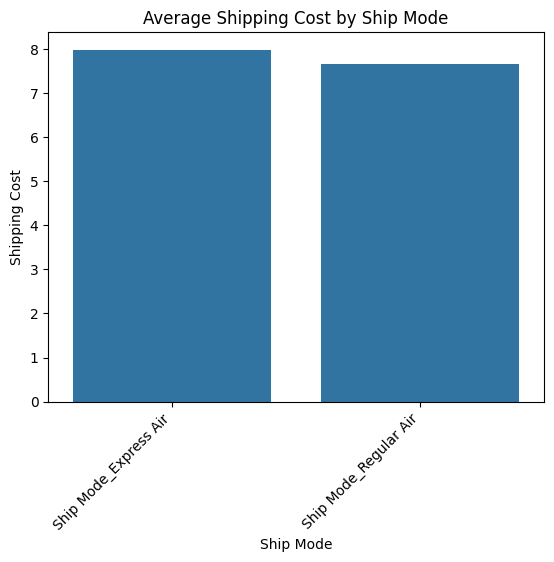

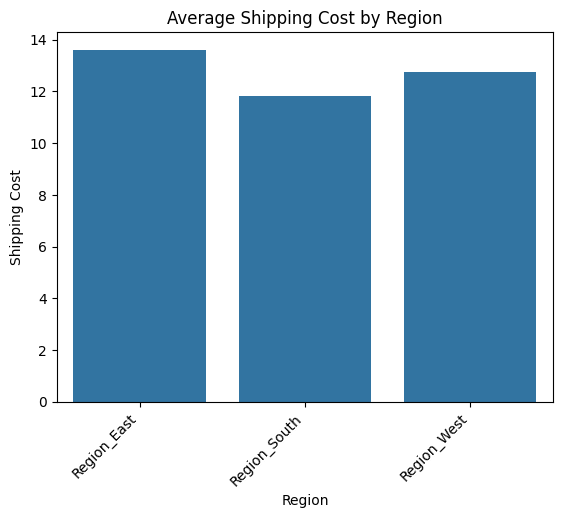

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



ship_mode_cols = [col for col in retail_data.columns if col.startswith('Ship Mode_')]
avg_shipping_cost_by_ship_mode = retail_data.groupby(ship_mode_cols)['Shipping Cost'].mean().reset_index()


melted_data = avg_shipping_cost_by_ship_mode.melt(id_vars=['Shipping Cost'], value_vars=ship_mode_cols,
                                                  var_name='Ship Mode', value_name='Count')

melted_data = melted_data[melted_data['Count'] == 1]


sns.barplot(x='Ship Mode', y='Shipping Cost', data=melted_data)
plt.title('Average Shipping Cost by Ship Mode')
plt.xticks(rotation=45, ha='right')
plt.show()


region_cols = [col for col in retail_data.columns if col.startswith('Region_')]
avg_shipping_cost_by_region = retail_data.groupby(region_cols)['Shipping Cost'].mean().reset_index()

melted_data_region = avg_shipping_cost_by_region.melt(id_vars=['Shipping Cost'], value_vars=region_cols,
                                                     var_name='Region', value_name='Count')
melted_data_region = melted_data_region[melted_data_region['Count'] == 1]

sns.barplot(x='Region', y='Shipping Cost', data=melted_data_region)
plt.title('Average Shipping Cost by Region')
plt.xticks(rotation=45, ha='right')
plt.show()